In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas
import numpy as np
import importlib

from classifiers.RandomClassifier import RandomClassifier 
from classifiers.DecisionTreeClassifier import DecisionTreeClassifier
from StatisticManager import StatisticManager

Read and show the head of the training data set

In [3]:
X_train=pandas.read_excel('../data/Dataset1_train/X_train.xlsx')
y_train=pandas.read_excel('../data/Dataset1_train/y_train.xlsx')
X_train.info()
X_train.head()
# y_train.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         958 non-null    float64
 1   volatile_acidity      979 non-null    float64
 2   citric_acid           963 non-null    float64
 3   residual_sugar        984 non-null    float64
 4   chlorides             971 non-null    float64
 5   free_sulfur_dioxide   966 non-null    float64
 6   total_sulfur_dioxide  978 non-null    float64
 7   density               977 non-null    float64
 8   pH                    965 non-null    float64
 9   sulphates             972 non-null    float64
 10  alcohol               965 non-null    float64
dtypes: float64(11)
memory usage: 88.0 KB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.23,0.40,1.6,0.063,NaN,67.0,0.99520,3.50,0.63,11.1
1,7.8,0.60,0.26,2.0,0.080,31.0,131.0,0.99622,NaN,0.52,9.9
2,9.7,0.69,0.32,2.5,0.088,22.0,91.0,0.99790,3.29,0.62,10.1
3,12.0,0.38,0.56,2.1,0.093,6.0,24.0,0.99925,3.14,0.71,10.9
4,6.4,0.64,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,NaN


- Fill all missing values with the median of that descriptive feature
- Profile the descriptive features of the training dataset

In [4]:
X_train.fillna(X_train.median(),inplace=True)

# from pandas_profiling import ProfileReport

# ProfileReport(X_train,title="X_train profiling")
# ProfileReport(y_train,title="y_train profiling")


Print the percentage of each classes

In [5]:
y_train["class_cat"]=y_train["class"].astype("category")
y_train.drop(["class"],axis=1,inplace=True)
y_train["class_cat"].value_counts(normalize=True)*100

5    41.739980
6    40.762463
7    12.121212
4     3.225806
8     1.368524
3     0.782014
Name: class_cat, dtype: float64

In [6]:
cls=DecisionTreeClassifier(depth=5,target_feature="class_cat")
# cls.fit(X_train[:10],y_train[:10])

# cls.fit(X_train,y_train)
# y_pred=cls.predict(X_train)
# print(y_pred)

class_cat


In [7]:
# cls=RandomClassifier(random_state=72510)

# cls.fit(X_train,y_train)

# y_pred=cls.predict(X_train)

# print(type(X_train),y_pred.shape)


/home/llt/ML/src/classifiers/DecisionNode.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  argmax.clear()


Accuracy: 54.071661237785015%


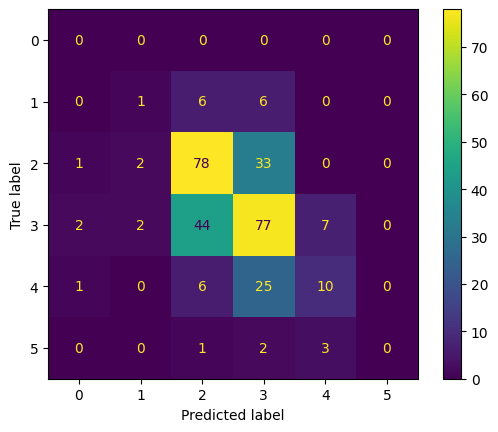

In [20]:

statistic=StatisticManager()
statistic.crossValidate(cls,X_train,y_train,cv=1)
# print(y_train)
# statistic.evaluate(y_train['class_cat'],y_pred)
